In [19]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

In [3]:
#loading the features of bag of words
import pickle
with open('bow_features.pickle','rb') as f:
    bow_features=pickle.load(f)

In [4]:
#loading train and test datasets
import pickle
with open('train_bow.pickle', 'rb') as f:
    x_bow=pickle.load(f)
with open('test_bow.pickle','rb') as f:
    test_bow=pickle.load(f)

In [5]:
with open('y_train.pickle', 'rb') as f:
    y_bow=pickle.load(f)
with open('y_test.pickle','rb') as f:
    y_test=pickle.load(f)

In [6]:
#normalizing the train and test data
from sklearn.preprocessing import normalize
x_bow=normalize(x_bow,axis=0)
test_bow=normalize(test_bow,axis=0)

In [7]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_cv , y_train, y_cv = train_test_split(x_bow, y_bow, test_size=0.2, random_state=42)

<h2>Logistic Regression on BOW</h2>

<h3>Applying Logistic Regression with L1 regularization on BOW,</h3>

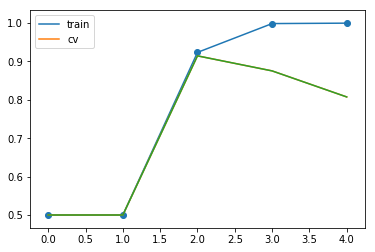

In [10]:
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
C_set=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in C_set:
    clf=LogisticRegression(penalty='l1',C=i)
    clf.fit(x_train,y_train)
    y_hat = clf.predict_proba(x_train)[:,1]
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.predict_proba(x_cv)[:,1]
    cv_metric.append(roc_auc_score(y_cv, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.plot([0,1,2,3,4],cv_metric)
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
clf=LogisticRegression(penalty='l1',C=1)
clf.fit(x_bow,y_bow)
pred=clf.predict_proba(test_bow)[:,1]
score=roc_auc_score(y_test, pred) * float(100)
print(score,"%")

92.46793440525404 %


In [17]:
pred=clf.predict(test_bow)
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[ 1987  1687]
 [  450 17293]]


Text(0.5,1,'Confusion Matrix\n')

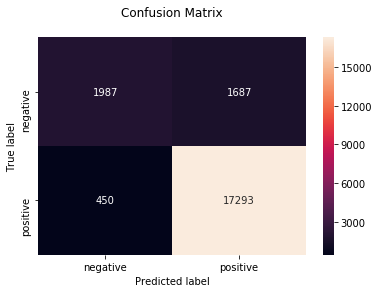

In [20]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h3>Applying Logistic Regression with L2 regularization on BOW</h3>

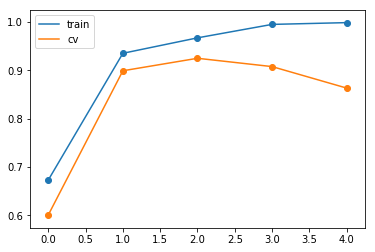

In [22]:
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
C_set=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in C_set:
    clf=LogisticRegression(penalty='l2',C=i)
    clf.fit(x_train,y_train)
    y_hat = clf.predict_proba(x_train)[:,1]
    train_metric.append(roc_auc_score(y_train, y_hat))
    y_hat = clf.predict_proba(x_cv)[:,1]
    cv_metric.append(roc_auc_score(y_cv, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
clf=LogisticRegression(penalty='l2',C=1)
clf.fit(x_bow,y_bow)
pred=clf.predict_proba(test_bow)[:,1]
score=roc_auc_score(y_test, pred) * float(100)
print(score,"%")

92.16116909760788 %


In [24]:
pred=clf.predict(test_bow)
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[  548  3126]
 [   99 17644]]


Text(0.5,1,'Confusion Matrix\n')

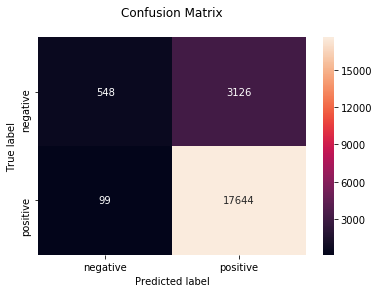

In [25]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h3>Calculating sparsity on weight vector obtained using L1 regularization on BOW</h3>

In [26]:
#l1 regularization with lambda=1000
import numpy as np
clf1=LogisticRegression(C=1,penalty='l1');
clf1.fit(x_train,y_train)
w=clf1.coef_
print(np.count_nonzero(w))

343


<h3>Performing pertubation test (multicollinearity check) on BOW</h3>

In [11]:
#computing weights for the X_1
clf1=LogisticRegression(C=1,penalty='l2')
clf1.fit(x_train,y_train)
w1=clf1.coef_

In [12]:
#co-efficients of the data
w1

array([[ 0.08930168,  0.11039691,  0.10911049, ...,  0.11108587,
        -0.37541443,  0.11457077]])

In [13]:
#introducing small noise eps
eps=0.00005
X_mod=x_train.data+eps

In [14]:
#converting into the shape of x_train matrix
from scipy.sparse import csr_matrix
X_mod=csr_matrix((X_mod, x_train.indices, x_train.indptr), shape=x_train.shape)

In [15]:
#computing weights for the X_1
clf2=LogisticRegression(C=1,penalty='l2')
clf2.fit(X_mod,y_train)
w2=clf2.coef_

In [16]:
w2

array([[ 0.08920872,  0.11036641,  0.10907836, ...,  0.11105116,
        -0.37522559,  0.11446093]])

In [17]:
#avoid divide by zero introducing small value
w1=w1+0.0000001
w2=w2+0.0000001

In [18]:
# Percentage change = (original - changed)/original * 100
diff = w1- w2
change = abs(diff)*1.0/w1
percentage_change = change * 100
percentage_change = percentage_change[0]
#percentage_change.shape

In [19]:
# Printing Percentiles :
for i in range(10, 101, 10):
    print("{:3d}th Percentile value : {:.5f}".format(i, np.percentile(percentage_change, i)))

 10th Percentile value : -0.05870
 20th Percentile value : -0.02008
 30th Percentile value : 0.00000
 40th Percentile value : 0.00427
 50th Percentile value : 0.01639
 60th Percentile value : 0.03118
 70th Percentile value : 0.04756
 80th Percentile value : 0.07037
 90th Percentile value : 0.11691
100th Percentile value : 69.39144


In [20]:
for i in range(90, 101, 1):
    print("{:3d}th Percentile value : {:.5f}".format(i, np.percentile(percentage_change, i)))

 90th Percentile value : 0.11691
 91th Percentile value : 0.12308
 92th Percentile value : 0.13170
 93th Percentile value : 0.14071
 94th Percentile value : 0.15367
 95th Percentile value : 0.17051
 96th Percentile value : 0.19318
 97th Percentile value : 0.21939
 98th Percentile value : 0.27994
 99th Percentile value : 0.44761
100th Percentile value : 69.39144


In [21]:
for i in range(1, 11, 1):
    print("{:.1f}th Percentile value :{:.5f}".format(i*1.0/10 + 99, np.percentile(percentage_change, i*1.0/10 + 99)))

99.1th Percentile value :0.48454
99.2th Percentile value :0.52831
99.3th Percentile value :0.59881
99.4th Percentile value :0.69447
99.5th Percentile value :0.91371
99.6th Percentile value :1.08703
99.7th Percentile value :1.39740
99.8th Percentile value :2.18961
99.9th Percentile value :4.45680
100.0th Percentile value :69.39144


As there is no much difference before and after features are not collinear  

<h3>Feature Importance on BOW</h3>

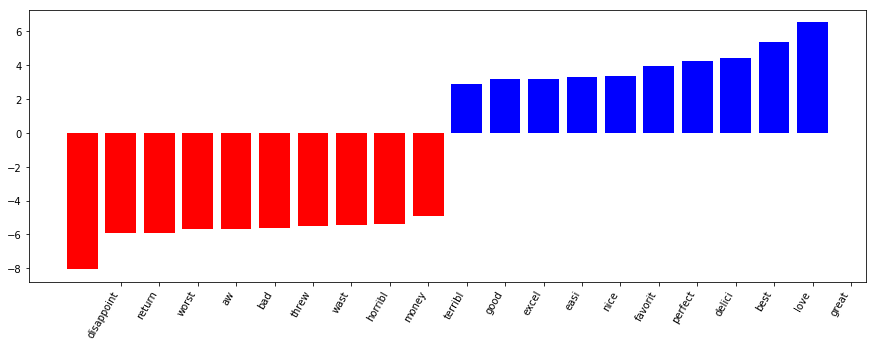

In [22]:
#top 10 features of both negative and positive class
import matplotlib.pyplot as plt
top_features=10
classifier=clf1
feature_names=bow_features
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
# create plot
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

<h1>Logistic Regression on TFIDF</h1>

In [27]:
import pickle
with open('tfidf_features.pickle','rb') as f:
    tfidf_features=pickle.load(f)

In [28]:
import pickle
with open('train_tfidf.pickle','rb') as f:
     x_tfidf=pickle.load(f)
with open('test_tfidf.pickle','rb') as f:
    test_tfidf=pickle.load(f)

In [29]:
#loading y_train and y_test dataset
with open('y_train_tfidf.pickle', 'rb') as f:
    y_train_tfidf=pickle.load(f)
with open('y_test_tfidf.pickle','rb') as f:
    y_test=pickle.load(f)

In [30]:
from sklearn.preprocessing import normalize
#normalising train and test datasets
x_tfidf = normalize(x_tfidf, axis=0)
test_tfidf = normalize(test_tfidf, axis=0)

In [31]:
from sklearn.model_selection import train_test_split
x_train_tfidf,x_cv_tfidf , y_train_tfidf, y_cv_tfidf = train_test_split(x_tfidf, y_train_tfidf, test_size=0.2, random_state=42,shuffle=False)

<h3>Applying Logistic Regression with L1 regularization on TFIDF</h3>

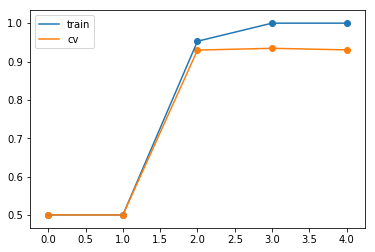

In [33]:
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
C_set=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in C_set:
    clf=LogisticRegression(penalty='l1',C=i)
    clf.fit(x_train_tfidf,y_train_tfidf)
    y_hat = clf.predict_proba(x_train_tfidf)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import roc_auc_score
clf=LogisticRegression(penalty='l1',C=1)
clf.fit(x_train_tfidf,y_train_tfidf)
pred=clf.predict_proba(test_tfidf)[:,1]
score=roc_auc_score(y_test, pred) * float(100)
print(score,"%")

93.43986960624002 %


In [37]:
pred=clf.predict(test_tfidf)
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[ 2117  1557]
 [  450 17293]]


Text(0.5,1,'Confusion Matrix\n')

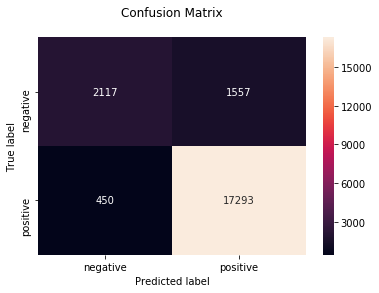

In [38]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h2>Applying Logistic Regression with L2 regularization on TFIDF</h2>

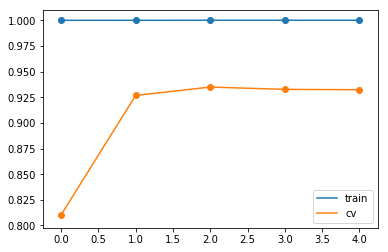

In [32]:
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
C_set=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in C_set:
    clf=LogisticRegression(penalty='l2',C=i)
    clf.fit(x_train_tfidf,y_train_tfidf)
    y_hat = clf.predict_proba(x_train_tfidf)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score
clf=LogisticRegression(penalty='l2',C=1)
clf.fit(x_train_tfidf,y_train_tfidf)
pred=clf.predict_proba(test_tfidf)[:,1]
score=roc_auc_score(y_test, pred) * float(100)
print(score,"%")

LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
0.9186451244220479


In [41]:
pred=clf.predict(test_tfidf)
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

[[ 1429  2245]
 [  146 17597]]


Text(0.5,1,'Confusion Matrix\n')

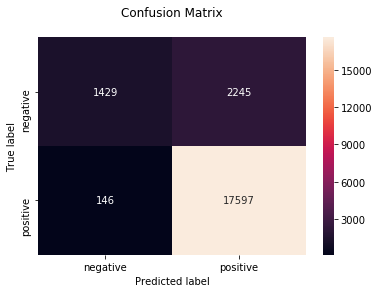

In [42]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h2>Feature Importance on TFIDF</h2>

In [7]:
#computing weights for the X_1
clf1=LogisticRegression(C=1,penalty='l2')
clf1.fit(x_tfidf,y_train_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

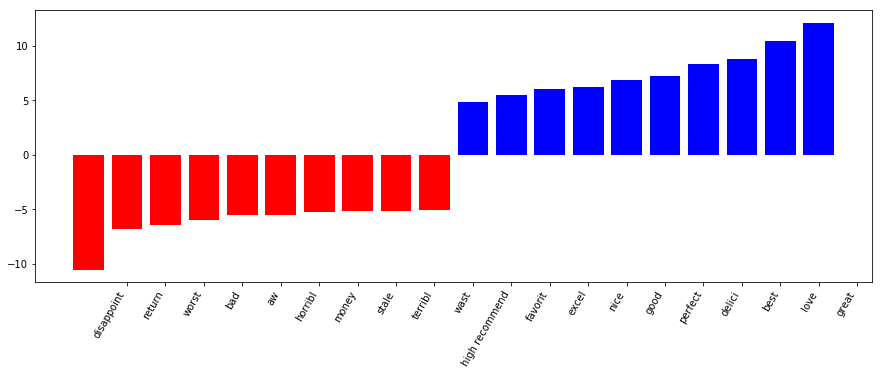

In [9]:
import matplotlib.pyplot as plt
import numpy as np
top_features=10
classifier=clf1
feature_names=tfidf_features
coef = classifier.coef_.ravel()
top_positive_coefficients = np.argsort(coef)[-top_features:]
top_negative_coefficients = np.argsort(coef)[:top_features]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
# create plot
plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
feature_names = np.array(feature_names)
plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
plt.show()

<h1>Logistic Regression on AVG W2V</h1>

In [46]:
import pickle
with open('train_avgw2v.pickle','rb') as f:
     x_avgw2v=pickle.load(f)
with open('test_avgw2v.pickle','rb') as f:
    test_avgw2v=pickle.load(f)

In [44]:
import pickle
with open('y_train_avgw2v.pickle','rb') as f:
     y_train_avgw2v=pickle.load(f)
with open('y_test_avgw2v.pickle','rb') as f:
    y_test_avgw2v=pickle.load(f)

In [47]:
x_avgw2v=normalize(x_avgw2v,axis=0)
test_avgw2v=normalize(test_avgw2v,axis=0)

In [49]:
x_train_avgw2v,x_cv_avgw2v, y_train_avgw2v, y_cv_avgw2v = train_test_split(x_avgw2v,y_train_avgw2v, test_size=0.2, random_state=42)

<h2> Applying Logistic Regression with L1 regularization on AVG W2V </h2>

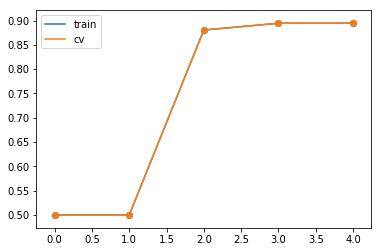

In [50]:
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
C_set=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in C_set:
    clf=LogisticRegression(penalty='l1',C=i)
    clf.fit(x_train_avgw2v,y_train_avgw2v)
    y_hat = clf.predict_proba(x_train_avgw2v)[:,1]
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.predict_proba(x_cv_avgw2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score
clf=LogisticRegression(penalty='l1',C=10000)
clf.fit(x_train_avgw2v,y_train_avgw2v)
pred=clf.predict_proba(test_avgw2v)[:,1]
score=roc_auc_score(y_test_avgw2v, pred) * float(100)
print(score,"%")

89.31803508823171 %


In [62]:
pred=clf.predict(test_avgw2v)
conf_matrix = confusion_matrix(y_test_avgw2v, pred)
print(conf_matrix)

[[  671  3003]
 [  153 17590]]


Text(0.5,1,'Confusion Matrix\n')

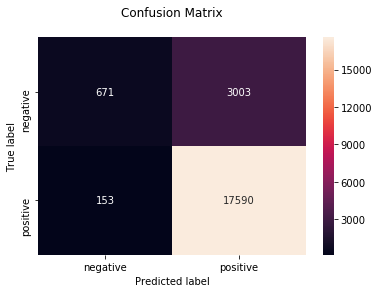

In [63]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h2>Applying Logistic Regression with L2 regularization on AVG W2V</h2>

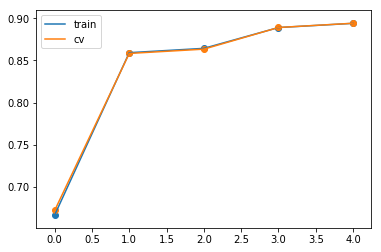

In [64]:
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
C_set=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in C_set:
    clf=LogisticRegression(penalty='l2',C=i)
    clf.fit(x_train_avgw2v,y_train_avgw2v)
    y_hat = clf.predict_proba(x_train_avgw2v)[:,1]
    train_metric.append(roc_auc_score(y_train_avgw2v, y_hat))
    y_hat = clf.predict_proba(x_cv_avgw2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_avgw2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score
clf=LogisticRegression(penalty='l2',C=1)
clf.fit(x_train_avgw2v,y_train_avgw2v)
pred=clf.predict_proba(test_avgw2v)[:,1]
score=roc_auc_score(y_test_avgw2v, pred) * float(100)
print(score,"%")

86.0108171804342 %


In [67]:
clf=LogisticRegression(penalty='l2',C=1000)
clf.fit(x_train_avgw2v,y_train_avgw2v)
pred=clf.predict(test_avgw2v)
conf_matrix = confusion_matrix(y_test_avgw2v, pred)
print(conf_matrix)

[[ 2140  1534]
 [ 1272 16471]]


Text(0.5,1,'Confusion Matrix\n')

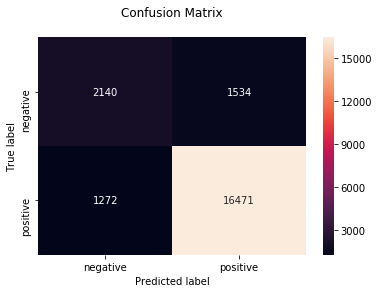

In [68]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h1>Logistic Regression on TFIDF W2V</h1>

In [69]:
import pickle
with open('x_train_tfidf_w2v.pickle','rb') as f:
     x_train_tfidf_w2v=pickle.load(f)
with open('x_test_tfidf_w2v.pickle','rb') as f:
    x_test_tfidf_w2v=pickle.load(f)

In [70]:
with open('y_train_tfidf_w2v.pickle','rb') as f:
     y_train_tfidf_w2v=pickle.load(f)
with open('y_test_tfidf_w2v.pickle','rb') as f:
    y_test_tfidf_w2v=pickle.load(f)

In [71]:
x_train_tfidf_w2v=normalize(x_train_tfidf_w2v,axis=0)
x_test_tfidf_w2v=normalize(x_test_tfidf_w2v,axis=0)

In [73]:
x_train_tfidf_w2v,x_cv_tfidf_w2v, y_train_tfidf_w2v, y_cv_tfidf_w2v = train_test_split(x_train_tfidf_w2v,y_train_tfidf_w2v, test_size=0.2, random_state=42)

<h2>Applying Logistic Regression with L1 regularization on TFIDF W2V</h2>

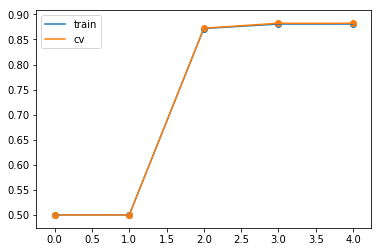

In [90]:
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
C_set=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in C_set:
    clf=LogisticRegression(penalty='l1',C=i)
    clf.fit(x_train_tfidf_w2v,y_train_tfidf_w2v)
    y_hat = clf.predict_proba(x_train_tfidf_w2v)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf_w2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.legend()
plt.show()

In [92]:
from sklearn.metrics import roc_auc_score
clf=LogisticRegression(penalty='l1',C=100)
clf.fit(x_train_tfidf_w2v,y_train_tfidf_w2v)
pred=clf.predict_proba(x_test_tfidf_w2v)[:,1]
score=roc_auc_score(y_test_tfidf_w2v, pred) * float(100)
print(score,"%")

88.38713492684907 %


In [88]:
pred=clf.predict(x_test_tfidf_w2v)
conf_matrix = confusion_matrix(y_test_tfidf_w2v, pred)
print(conf_matrix)

[[ 1175  1188]
 [  583 11332]]


Text(0.5,1,'Confusion Matrix\n')

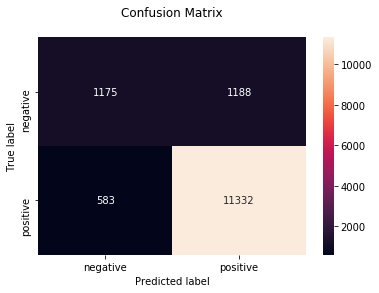

In [89]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

<h2> Applying Logistic Regression with L2 regularization on TFIDF W2V</h2>

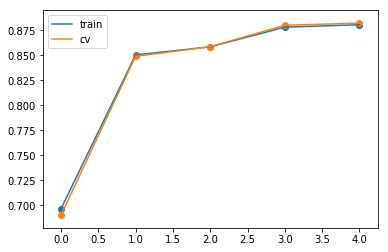

In [85]:
from sklearn.metrics import roc_auc_score
train_metric = []
cv_metric= []
C_set=[10**-4, 10**-2, 10**0, 10**2, 10**4]
for i in C_set:
    clf=LogisticRegression(penalty='l2',C=i)
    clf.fit(x_train_tfidf_w2v,y_train_tfidf_w2v)
    y_hat = clf.predict_proba(x_train_tfidf_w2v)[:,1]
    train_metric.append(roc_auc_score(y_train_tfidf_w2v, y_hat))
    y_hat = clf.predict_proba(x_cv_tfidf_w2v)[:,1]
    cv_metric.append(roc_auc_score(y_cv_tfidf_w2v, y_hat))
plt.plot(train_metric, label="train")
plt.scatter([0,1,2,3,4],train_metric)
plt.plot(cv_metric, label="cv")
plt.scatter([0,1,2,3,4],cv_metric)
plt.legend()
plt.show()

In [82]:
from sklearn.metrics import roc_auc_score
clf=LogisticRegression(penalty='l2',C=100)
clf.fit(x_train_tfidf_w2v,y_train_tfidf_w2v)
pred=clf.predict_proba(x_test_tfidf_w2v)[:,1]
score=roc_auc_score(y_test_tfidf_w2v, pred) * float(100)
print(score,"%")

88.18217061215631 %


In [83]:
pred=clf.predict(x_test_tfidf_w2v)
conf_matrix = confusion_matrix(y_test_tfidf_w2v, pred)
print(conf_matrix)

[[ 1394   969]
 [  931 10984]]


Text(0.5,1,'Confusion Matrix\n')

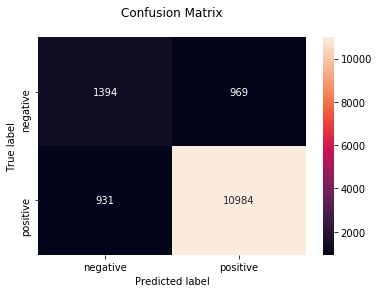

In [84]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
ax=plt.subplot()
sns.heatmap(conf_matrix,annot=True,ax=ax,fmt='d')
#labels
ax.set_xlabel('Predicted label');
ax.set_ylabel('True label')
ax.xaxis.set_ticklabels(['negative','positive']);
ax.yaxis.set_ticklabels(['negative','positive'])
plt.title("Confusion Matrix\n")

|Logistic Regression on| penalty| C| Accuracy|
|----|---|---|---|
|BOW|l1|1| 93.89%|
|BOW|l2|100|93.88%|
|TFIDF|l1|1|94.51%|
|TFIDF|l2|10000|91.86%|
|Avgw2v|l1|10000|89.31%|
|Avgw2v|l2|1|86.01%|
|TFIDF W2V|l1|1|88.38%|
|TFIDF W2V|l2|100|88.18%|
